# Kenetrian Garindaru - 1101180120 - Tugas Pertemuan 14 Wireless Modelling

In [105]:
import numpy as np
import matplotlib.pyplot as plt

In [125]:
def ploss(fc,ht,d,area,hg) :

  #nilai c1 & c2
  if fc in range(150,1500):
        c1 = 69.55
        c2 = 26.16
  elif fc in range(1501,2001):
    c1 = 46.3
    c2 = 33.9
  
  #nilai cm
  if area == "urban":
    cm = 0
  elif area == "suburb":
    cm = -2*((np.log10((fc/28)**2))-5.4)
  elif area == "open":
    cm = -4.78*(np.log10(fc)) + (18.33*np.log10(fc)) - 40.94


 
  ahg = (1.1*np.log10(fc)-0.7)*hg-(1.56*np.log10(fc)-1.8)
  Lp = c1+(c2*np.log10(fc))-(13.83*np.log(ht))-ahg+((44.9-6.55*np.log10(ht))*np.log10(d))- cm
  return Lp

In [126]:
freq = 1800 #Hz
jumlah = 200
h_bts = 80 #m
h_user = 1.5 #m

In [127]:
dMin = 300 #m
dMax = 1000 #m
d = np.random.randint(dMin,dMax,N)

In [108]:
LpUrban = ploss(f,h_bts,d,"urban",h_user)
LpSuburb = ploss(f,h_bts,d,"suburb",h_user)
LpOpen = ploss(f,h_bts,d,"open",h_user)

In [128]:
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Suburb_sort=LpSuburb[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

In [109]:
def Preceive(Ptx,PL,Gtx,Grx) :
  Prx = Ptx - PL + Gtx + Grx
  return Prx

In [110]:
NtL = lambda x: 10*np.log10(x)

DayaTx = NtL(30) #dBm
gain_pengirim= 10 #dB
gain_penerima = 2 #dB

In [143]:
PrxUrban = Preceive(DayaTx,Urban_sort,gain_pengirim,gain_penerima)
PrxSuburb = Preceive(DayaTx,Suburb_sort,gain_pengirim,gain_penerima)
PrxOpen = Preceive(DayaTx,Open_sort,gain_pengirim,gain_penerima)


LtN = lambda x: 10**(x/10)

In [144]:
PrxUrban1 = LtN(PrxUrban)
PrxSuburb1 = LtN(PrxSuburb)
PrxOpen1 = LtN(PrxOpen)

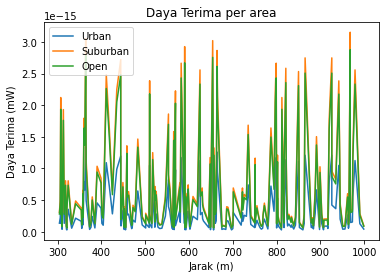

In [145]:
plt.figure()
plt.plot(d_sort,PrxUrban1, label = "Urban") #x,y
plt.plot(d_sort,PrxSuburb1,label = "Suburban")
plt.plot(d_sort,PrxOpen1, label = "Open")
plt.legend()
plt.title("Daya Terima per area")
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (mW)')
plt.show()

In [113]:
LpU700 = ploss(700,h_bts,d,"urban",h_user)
LpU900 = ploss(900,h_bts,d,"urban",h_user)
LpU1800 = ploss(1800,h_bts,d,"urban",h_user)

d_sort=d[np.argsort(d)]
U700_sort=LpU700[np.argsort(d)]
U900_sort=LpU900[np.argsort(d)]
U1800_sort=LpU1800[np.argsort(d)]

In [114]:
PrxU700 = Preceive(DayaTx,U700_sort,gain_pengirim,gain_penerima)
PrxU900 = Preceive(DayaTx,U900_sort,gain_pengirim,gain_penerima)
PrxU1800 = Preceive(DayaTx,U1800_sort,gain_pengirim,gain_penerima)


LtN = lambda x: 10**(x/10)

PrxU7001 = LtN(PrxU700)
PrxU9001 = LtN(PrxU900)
PrxU18001 = LtN(PrxU1800)

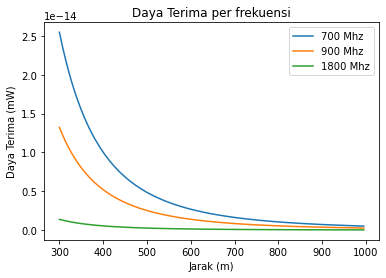

In [115]:
plt.figure()
plt.plot(d_sort,PrxU7001, label = "700 Mhz") #x,y
plt.plot(d_sort,PrxU9001,label = "900 Mhz")
plt.plot(d_sort,PrxU18001, label = "1800 Mhz")
plt.legend()
plt.title("Daya Terima per frekuensi")
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (mW)')
plt.show()

In [116]:
def ratio(Prx, Bw) :
  Noise = -174 + 10*np.log10(Bw)
  No = LtN(Noise)
  SNR = Prx/No
  return SNR

In [117]:
bandwidth = 5000#Hz

SNRUrban = ratio(PrxUrban1, bandwidth)
SNRSuburb = ratio(PrxSuburb1, bandwidth)
SNROpen = ratio(PrxOpen1, bandwidth)

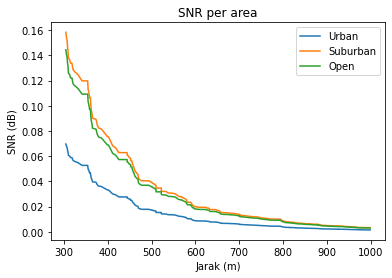

In [131]:
plt.figure()
plt.plot(d_sort,SNRUrban, label = "Urban") #x,y
plt.plot(d_sort,SNRSuburb,label = "Suburban")
plt.plot(d_sort,SNROpen, label = "Open")
plt.legend()
plt.title("SNR per area")
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

In [132]:
SNRU700 = ratio(PrxU7001, bandwidth)
SNRU900 = ratio(PrxU9001, bandwidth)
SNRU1800 = ratio(PrxU18001, bandwidth)

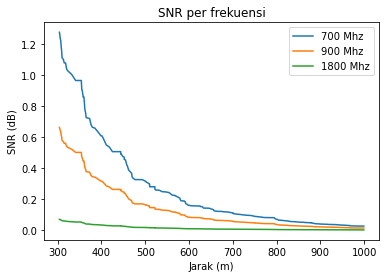

In [133]:
plt.figure()
plt.plot(d_sort,SNRU700, label = "700 Mhz") #x,y
plt.plot(d_sort,SNRU900,label = "900 Mhz")
plt.plot(d_sort,SNRU1800, label = "1800 Mhz")
plt.legend()
plt.title("SNR per frekuensi")
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

In [134]:
def kapasitas(SNR,BW) :
  cap = BW * np.log2(1+SNR)
  return cap

In [135]:
CAPUrban = kapasitas(SNRUrban, bandwidth)
CAPSuburb = kapasitas(SNRSuburb, bandwidth)
CAPOpen = kapasitas(SNROpen, bandwidth)

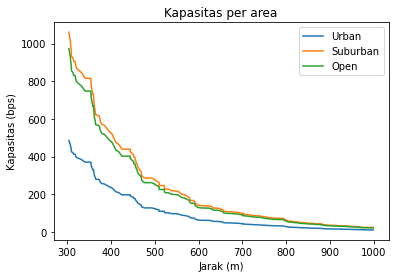

In [136]:
plt.figure()
plt.plot(d_sort,CAPUrban, label = "Urban") #x,y
plt.plot(d_sort,CAPSuburb,label = "Suburban")
plt.plot(d_sort,CAPOpen, label = "Open")
plt.legend()
plt.title("Kapasitas per area")
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()

In [124]:
CAPU700 = kapasitas(SNRU700, bandwidth)
CAPU900 = kapasitas(SNRU900, bandwidth)
CAPU1800 = kapasitas(SNRU1800, bandwidth)

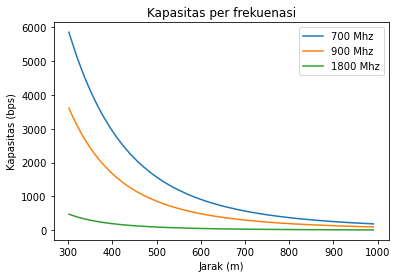

In [104]:
plt.figure()
plt.plot(d_sort,CAPU700, label = "700 Mhz") #x,y
plt.plot(d_sort,CAPU900,label = "900 Mhz")
plt.plot(d_sort,CAPU1800, label = "1800 Mhz")
plt.legend()
plt.title("Kapasitas per frekuenasi")
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()